## Matrix Representation of LIF

### Next V Function
$$ M_V = \begin{pmatrix}  1-\frac {dt}{\tau} ,& \frac{Rdt}{\tau} \end{pmatrix}, \quad V_{\text{next}} = M_V \mathbf x$$


### Spike Function
$$
\begin{cases} p^+(V) = V > E_1 \\ p^-(V) = V < 0  \end{cases}
$$

$$
\begin{align*}
T_S(V) =& p^+ \\ 
T_V(V) =& (1-p^+)(1-p^-)V + p^+E_{-1}
\end{align*}
$$


In [11]:
import numpy as np

### Constant
dt = 0.01 # 시뮬레이션 시간 간격 (ms)
R = 10 # 막 저항 (Ohm)
tau = 20 # 불응기 상수
E_1 = 10 # 발화 역치 (mV)
E_minus = -10 # 과분극 (mV)

### 전위 전이 함수

In [12]:

M_V = np.array([1-dt/tau, R * dt / tau])

def V_next(volt: float, current: float) -> float:
    """
    Args:
        volt: 현재 막전위 (mV)
        current: 입력 전류 (mA)

    Returns:
        float: 다음 시점의 막전위
    """
    return M_V @ np.array([volt, current])

In [13]:
V = np.arange(0, 10, 0.1)
I = np.ones(100)

V_next(V, I)

array([5.000000e-04, 1.004950e-01, 2.004900e-01, 3.004850e-01,
       4.004800e-01, 5.004750e-01, 6.004700e-01, 7.004650e-01,
       8.004600e-01, 9.004550e-01, 1.000450e+00, 1.100445e+00,
       1.200440e+00, 1.300435e+00, 1.400430e+00, 1.500425e+00,
       1.600420e+00, 1.700415e+00, 1.800410e+00, 1.900405e+00,
       2.000400e+00, 2.100395e+00, 2.200390e+00, 2.300385e+00,
       2.400380e+00, 2.500375e+00, 2.600370e+00, 2.700365e+00,
       2.800360e+00, 2.900355e+00, 3.000350e+00, 3.100345e+00,
       3.200340e+00, 3.300335e+00, 3.400330e+00, 3.500325e+00,
       3.600320e+00, 3.700315e+00, 3.800310e+00, 3.900305e+00,
       4.000300e+00, 4.100295e+00, 4.200290e+00, 4.300285e+00,
       4.400280e+00, 4.500275e+00, 4.600270e+00, 4.700265e+00,
       4.800260e+00, 4.900255e+00, 5.000250e+00, 5.100245e+00,
       5.200240e+00, 5.300235e+00, 5.400230e+00, 5.500225e+00,
       5.600220e+00, 5.700215e+00, 5.800210e+00, 5.900205e+00,
       6.000200e+00, 6.100195e+00, 6.200190e+00, 6.3001

### 스파이크 계산 함수

In [14]:
def p_plus(volt):
    return volt>E_1

def p_minus(volt):
    return volt < 0


def check_spike(volt):
    """
    Args:
        volt: 막전위
    Returns:
        tuple: (spike, volt)
    """

    s = p_plus(volt)
    v = (1-s)*(1-p_minus(volt))*volt + s * E_minus

    return np.array([s, v])

In [15]:
V = np.arange(-1, 15, 0.5)
# check_spike(V)

### 통합 함수

In [16]:
V = np.arange(0, 20, 0.1)
I = np.ones(200)

V = V_next(V, I)
# check_spike(V)

### Example1: 상수 전류의 유입에 따른 활성 빈도

In [17]:
max_time = 1000


I_serize = np.arange(0, 3, 0.01)
n_of_neuron = len(I_serize)
V_serize = np.zeros(n_of_neuron)
spike_history = []

t = 0

while t < max_time :
    v = V_next(V_serize, I_serize)
    result = check_spike(v)

    spike_history.append(result[0])
    V_serize = result[1]
    t += dt

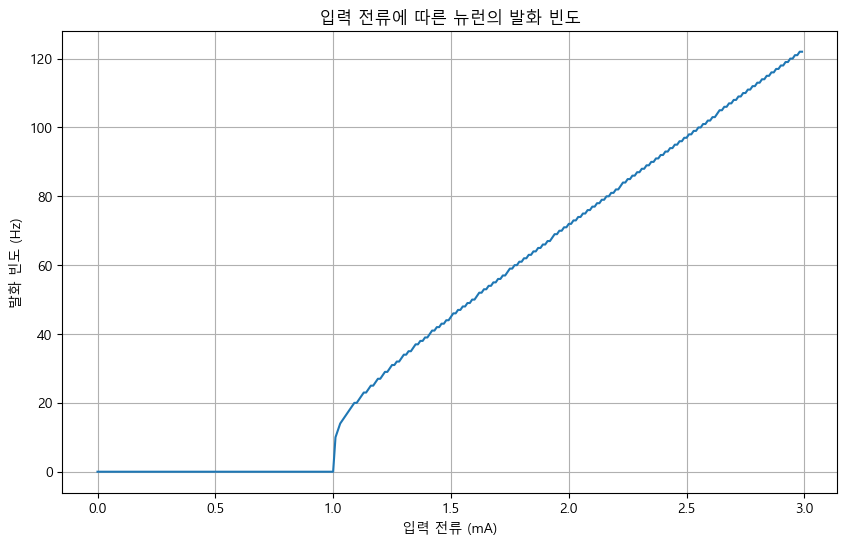

In [18]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정

spike_history = np.array(spike_history)  # shape: (시간, 뉴런 수)

firing_rates = np.sum(spike_history, axis=0) / (max_time/1000)  # Hz 단위로 변환

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(I_serize, firing_rates, '-')
plt.xlabel('입력 전류 (mA)')
plt.ylabel('발화 빈도 (Hz)')
plt.title('입력 전류에 따른 뉴런의 발화 빈도')
plt.grid(True)
plt.show()